# The Models

---

In an attempt to recreate the same models I executed back in December 2020, I will be utilizing the same packages in order to understand what my aim was for the project.

This is to improve the final results I had before to see if my problem statement still holds true.

In [47]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score, roc_curve

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report

import pickle

In [2]:
df = pd.read_csv('train_test_2021.csv')

In [4]:
# Check to make sure this is the data set that I want
df.head()

,release_speed,release_pos_x,release_pos_z,stand,p_throws,type,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,release_spin_rate,pitch_name
0,93.1,1.35,6.73,R,L,S,0.81,1.52,0.78,2.13,-3.230974,-135.201801,-9.255781,10.678480,31.699974,-11.705800,2216.0,4-Seam Fastball
1,93.6,1.31,6.80,L,L,B,0.90,1.43,-1.15,1.51,-8.265487,-135.578023,-10.936295,12.932808,31.370147,-12.168466,2239.0,4-Seam Fastball
2,94.4,1.17,6.90,L,L,S,0.98,1.51,-0.51,1.94,-6.522955,-136.831453,-10.386551,13.868821,33.970155,-10.998025,2375.0,4-Seam Fastball
3,95.0,1.19,6.84,L,L,B,0.78,1.55,-0.72,3.54,-6.691365,-138.029105,-6.351737,11.532212,35.020703,-11.188066,2329.0,4-Seam Fastball
4,81.6,1.78,6.62,R,L,B,-0.58,-0.26,-0.66,1.13,-4.358323,-118.762313,-5.279821,-4.643198,22.102421,-33.822539,2295.0,Slider


In [5]:
df['type'].value_counts(normalize=True)

B    0.670057
S    0.329943
Name: type, dtype: float64

In [7]:
# Since type is a confusing column name, we will rename it to 'result'
df.rename(columns={'type':'result'}, inplace=True)
df.head()

,release_speed,release_pos_x,release_pos_z,stand,p_throws,result,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,release_spin_rate,pitch_name
0,93.1,1.35,6.73,R,L,S,0.81,1.52,0.78,2.13,-3.230974,-135.201801,-9.255781,10.678480,31.699974,-11.705800,2216.0,4-Seam Fastball
1,93.6,1.31,6.80,L,L,B,0.90,1.43,-1.15,1.51,-8.265487,-135.578023,-10.936295,12.932808,31.370147,-12.168466,2239.0,4-Seam Fastball
2,94.4,1.17,6.90,L,L,S,0.98,1.51,-0.51,1.94,-6.522955,-136.831453,-10.386551,13.868821,33.970155,-10.998025,2375.0,4-Seam Fastball
3,95.0,1.19,6.84,L,L,B,0.78,1.55,-0.72,3.54,-6.691365,-138.029105,-6.351737,11.532212,35.020703,-11.188066,2329.0,4-Seam Fastball
4,81.6,1.78,6.62,R,L,B,-0.58,-0.26,-0.66,1.13,-4.358323,-118.762313,-5.279821,-4.643198,22.102421,-33.822539,2295.0,Slider


In [10]:
# We will turn the stand, p_throws, and result into binary columns
# This is so that we can include a batter's stance, a pitcher's stance
# and result of the play as something numeric
make_binary = ['stand','p_throws','result']
pd.get_dummies(df, columns=make_binary, drop_first=True).head()

# This shows that righties (R) are 1 while lefties (L) are 0
# As well as strikes (S) being represented as 1 and balls (B) as 0

,release_speed,release_pos_x,release_pos_z,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,release_spin_rate,pitch_name,stand_R,p_throws_R,result_S
0,93.1,1.35,6.73,0.81,1.52,0.78,2.13,-3.230974,-135.201801,-9.255781,10.678480,31.699974,-11.705800,2216.0,4-Seam Fastball,1,0,1
1,93.6,1.31,6.80,0.90,1.43,-1.15,1.51,-8.265487,-135.578023,-10.936295,12.932808,31.370147,-12.168466,2239.0,4-Seam Fastball,0,0,0
2,94.4,1.17,6.90,0.98,1.51,-0.51,1.94,-6.522955,-136.831453,-10.386551,13.868821,33.970155,-10.998025,2375.0,4-Seam Fastball,0,0,1
3,95.0,1.19,6.84,0.78,1.55,-0.72,3.54,-6.691365,-138.029105,-6.351737,11.532212,35.020703,-11.188066,2329.0,4-Seam Fastball,0,0,0
4,81.6,1.78,6.62,-0.58,-0.26,-0.66,1.13,-4.358323,-118.762313,-5.279821,-4.643198,22.102421,-33.822539,2295.0,Slider,1,0,0


In [11]:
# Change DF and rename columns
df = pd.get_dummies(df, columns=make_binary, drop_first=True)
df.rename(columns={'stand_R':'batter_stance','p_throws_R':'pitchers_throwing_hand','result_S':'result'},inplace=True)
df.head()

,release_speed,release_pos_x,release_pos_z,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,release_spin_rate,pitch_name,batter_stance,pitchers_throwing_hand,result
0,93.1,1.35,6.73,0.81,1.52,0.78,2.13,-3.230974,-135.201801,-9.255781,10.678480,31.699974,-11.705800,2216.0,4-Seam Fastball,1,0,1
1,93.6,1.31,6.80,0.90,1.43,-1.15,1.51,-8.265487,-135.578023,-10.936295,12.932808,31.370147,-12.168466,2239.0,4-Seam Fastball,0,0,0
2,94.4,1.17,6.90,0.98,1.51,-0.51,1.94,-6.522955,-136.831453,-10.386551,13.868821,33.970155,-10.998025,2375.0,4-Seam Fastball,0,0,1
3,95.0,1.19,6.84,0.78,1.55,-0.72,3.54,-6.691365,-138.029105,-6.351737,11.532212,35.020703,-11.188066,2329.0,4-Seam Fastball,0,0,0
4,81.6,1.78,6.62,-0.58,-0.26,-0.66,1.13,-4.358323,-118.762313,-5.279821,-4.643198,22.102421,-33.822539,2295.0,Slider,1,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357046 entries, 0 to 357045
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   release_speed           357046 non-null  float64
 1   release_pos_x           357046 non-null  float64
 2   release_pos_z           357046 non-null  float64
 3   pfx_x                   357046 non-null  float64
 4   pfx_z                   357046 non-null  float64
 5   plate_x                 357046 non-null  float64
 6   plate_z                 357046 non-null  float64
 7   vx0                     357046 non-null  float64
 8   vy0                     357046 non-null  float64
 9   vz0                     357046 non-null  float64
 10  ax                      357046 non-null  float64
 11  ay                      357046 non-null  float64
 12  az                      357046 non-null  float64
 13  release_spin_rate       357046 non-null  float64
 14  pitch_name          

Since we have `pitch_name` as a qualitative column for data, we will do two models, one where the name of the pitch is known and the other, without, just the pitch mechanics.

In [13]:
# let's make a copy of df as df2, 
# this will be df2 will not have the pitch names included
df2 = df.copy()

In [14]:
df2 = df2.loc[:, df2.columns != 'pitch_name']
df2.head()

,release_speed,release_pos_x,release_pos_z,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,release_spin_rate,batter_stance,pitchers_throwing_hand,result
0,93.1,1.35,6.73,0.81,1.52,0.78,2.13,-3.230974,-135.201801,-9.255781,10.678480,31.699974,-11.705800,2216.0,1,0,1
1,93.6,1.31,6.80,0.90,1.43,-1.15,1.51,-8.265487,-135.578023,-10.936295,12.932808,31.370147,-12.168466,2239.0,0,0,0
2,94.4,1.17,6.90,0.98,1.51,-0.51,1.94,-6.522955,-136.831453,-10.386551,13.868821,33.970155,-10.998025,2375.0,0,0,1
3,95.0,1.19,6.84,0.78,1.55,-0.72,3.54,-6.691365,-138.029105,-6.351737,11.532212,35.020703,-11.188066,2329.0,0,0,0
4,81.6,1.78,6.62,-0.58,-0.26,-0.66,1.13,-4.358323,-118.762313,-5.279821,-4.643198,22.102421,-33.822539,2295.0,1,0,0


In [17]:
# Let's dummify pitch name for the original dataframe
df = pd.get_dummies(df, columns=['pitch_name'], prefix='pitch', drop_first=True)

# Let's ask some questions

Can we predict the call of a baseball pitch thrown based on ____?

In [18]:
print(df.columns)
print(df2.columns)

Index(['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
       'release_spin_rate', 'batter_stance', 'pitchers_throwing_hand',
       'result', 'pitch_Changeup', 'pitch_Curveball', 'pitch_Cutter',
       'pitch_Eephus', 'pitch_Fastball', 'pitch_Knuckle Curve',
       'pitch_Knuckleball', 'pitch_Sinker', 'pitch_Slider',
       'pitch_Split-Finger'],
      dtype='object')
Index(['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
       'release_spin_rate', 'batter_stance', 'pitchers_throwing_hand',
       'result'],
      dtype='object')


We will start with `df2` and focus on the mechanics and physics of the pitch.

In [24]:
X = df2.iloc[:,:-1] # A matrix containing features we want
X.head()
y = df2.result # A vector we are aiming for

In [25]:
# Use train test split to split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

In [28]:
# Check the splits are correct
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((267784, 16), (89262, 16), (267784,), (89262,))

In [29]:
# Since the project and presentation used RandomForest, we will start with that

# We will even use the parameters from the previous models
params = ({
    'n_estimators':[100,150,200],
    'max_depth':[2,3,4,5],
    'max_features':['log2','auto']
})

In [30]:
rf = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=params,
                        n_jobs=8,
                        verbose=2,
                        random_state=66)

In [31]:
rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:  3.4min finished


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=8,
                   param_distributions={'max_depth': [2, 3, 4, 5],
                                        'max_features': ['log2', 'auto'],
                                        'n_estimators': [100, 150, 200]},
                   random_state=66, verbose=2)

In [32]:
rf.score(X_train, y_train)

0.9207532936993995

In [33]:
rf.score(X_test, y_test)

0.9198763191503664

In [34]:
rf.best_params_

{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 5}

In [35]:
# Check accuracy of our test but why are they the same?
preds = rf.predict(X_test)
accuracy_score(y_test, preds)

0.9198763191503664

Let's ensure that we have good accuracy of the model by looking at the **Null Accuracy**.

In [41]:
print(y_test.value_counts()); y_test.mean() 
# The mean will give a mean of the percentage of 1's

0    59864
1    29398
Name: result, dtype: int64


0.32934507405166813

In [42]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6706549259483319

In [43]:
max(y_test.mean(), 1 - y_test.mean())

0.6706549259483319

The dumb model would always predict 0 and be 68% correct.

- The accuracy on the RandomForest model is better than a dumb model
- We have overachieved the minimum

### Now, A Random Forest but on a GridSearch

In [36]:
rf2 = GridSearchCV(RandomForestClassifier(random_state=66),
                       param_grid=params,
                       n_jobs=8,
                       verbose=2)

In [37]:
rf2.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed: 11.1min finished


GridSearchCV(estimator=RandomForestClassifier(random_state=66), n_jobs=8,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [38]:
print(f'Train score: {rf2.score(X_train, y_train)}')
print(f'Test score: {rf2.score(X_test, y_test)}')
rf2.best_params_

Train score: 0.9209288082932513
Test score: 0.9196522596401604


{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}

In [39]:
preds2 = rf2.predict(X_test)
accuracy_score(y_test, preds2)

0.9196522596401604

Our accuracy on this model is around the same as our initial model. With that being said, it is also better than our null model meaning that one or more of the features prove influence on the result of the pitch.

## Confusion Matrix of our RandomForestClassifiers

---
Looking at the confusion matricies below, it shows that the false positives and false negatives were small in comparison to the model prediciting a strike and/or ball call. That being said, it seems that during the 2021 MLB season, just looking at the location and understanding the speed of a pitch, how a pitcher throws, and the stance of a batter does in someway determine the influence of a call.

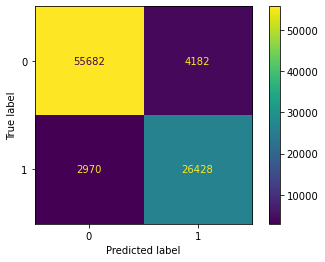

In [51]:
plot_confusion_matrix(rf, X_test, y_test)
plt.show()

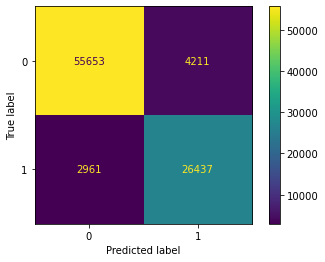

In [53]:
plot_confusion_matrix(rf2, X_test, y_test)
plt.show()

## Next, run the models that have the pitch name included

aka we will use `df` dataframe containing the categorical variable "pitch name" the have been dummified.